In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [211]:
from plotting import *

In [4]:
dataDir = "."

In [5]:
list_of_runs = []
# If list is empty, all runs of the following experiment will be loaded
experimentName='LongRun-16-seed-32345'

In [6]:
M = 16

### If list of runs is empty, load all runs from [experimentName]

In [7]:
if len(list_of_runs)==0:
    for folder in listdir(dataDir):
        if folder[:len(experimentName)]==experimentName:
            list_of_runs.append(folder)

### Load listed runs

In [8]:
loss_results, acc_results = load_list_of_runs(list_of_runs)

Loading run logs:
----------------
LongRun-16-seed-32345-0.0005--0.3-False
LongRun-16-seed-32345-0.0005-0.0-False
LongRun-16-seed-32345-0.0005-0.3-False
LongRun-16-seed-32345-0.0005-0.3-True
LongRun-16-seed-32345-0.0005-0.6-True
LongRun-16-seed-32345-0.0005-0.9-True
LongRun-16-seed-32345-0.001--0.3-False
LongRun-16-seed-32345-0.001-0.0-False
LongRun-16-seed-32345-0.001-0.3-False
LongRun-16-seed-32345-0.001-0.3-True
LongRun-16-seed-32345-0.001-0.6-True
LongRun-16-seed-32345-0.001-0.9-True
LongRun-16-seed-32345-0.005--0.3-False
LongRun-16-seed-32345-0.005-0.0-False
LongRun-16-seed-32345-0.005-0.3-False
LongRun-16-seed-32345-0.005-0.3-True
LongRun-16-seed-32345-0.005-0.6-True
LongRun-16-seed-32345-0.005-0.9-True


## Enter batch time averages here

In [9]:
SYNC_SECONDS_PER_BATCH = 24

ASYNC_SECONDS_PER_BATCH = 20

In [43]:
import re

Loading run logs:
-----------------
LongRun-16-seed-32345-0.0005-0.3-False
LongRun-16-seed-32345-0.0005-0.3-True
LongRun-16-seed-32345-0.0005-0.3-False
LongRun-16-seed-32345-0.0005-0.3-True


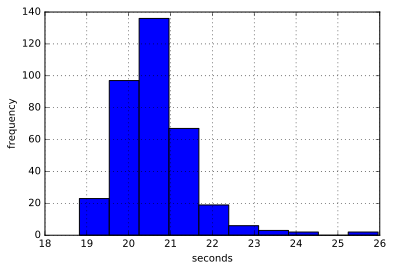

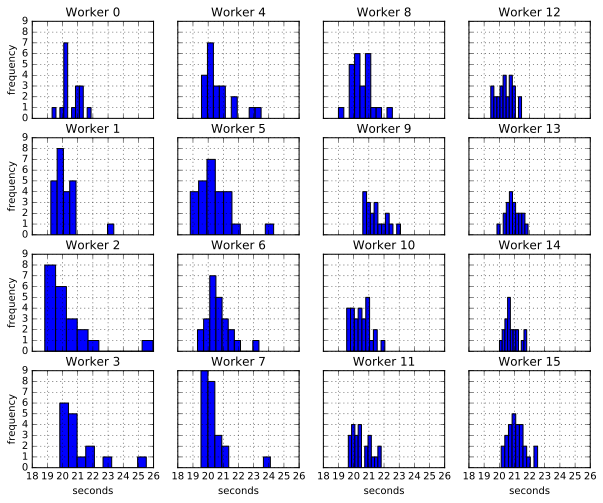

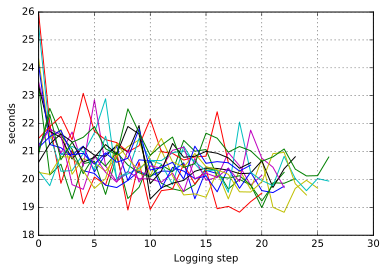

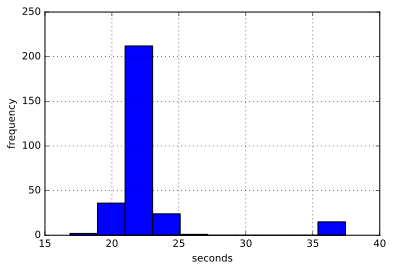

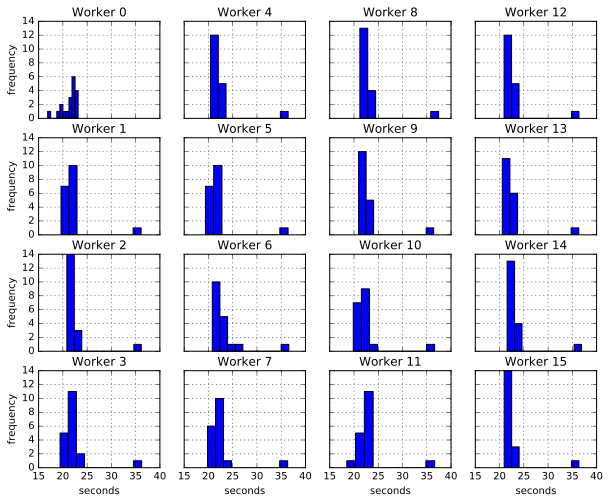

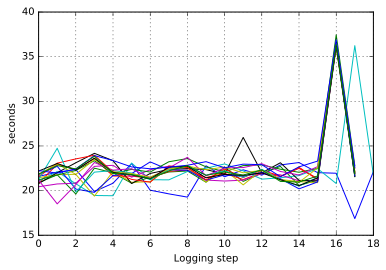

In [222]:
f1,f2,f3=plot_times(['LongRun-16-seed-32345-0.0005-0.3-False','LongRun-16-seed-32345-0.0005-0.3-True'
], M=16)


## Overview of all smoothed curves 

In [10]:
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v'}
marker_dict = {'0.0005':'s', '0.001':'o', '0.005':'v', '0.01':'D'}
marker_dict = {'0.0':',', '0.0005':'s', '0.001':'o', '0.0025':'+', '0.005':'v', '0.01':'D', '0.025':'.', '0.05':'*', '0.1':'^'}

In [36]:
WINDOW = 400

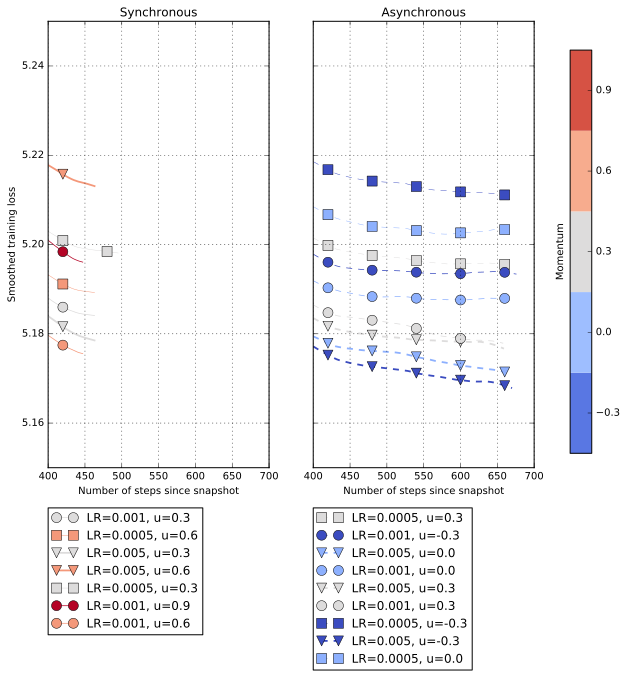

In [37]:
f = plot_all_runs(loss_results, window=WINDOW, two_panels=True, marker_dict=marker_dict, mark_every=60,
                    axis=[None, None, 5.15, 5.25])

## Parameter space loss contours 

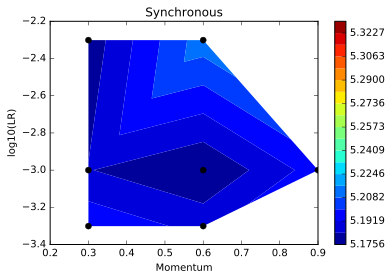

In [38]:
plot_loss_contour(loss_results, window=WINDOW, sync=True)

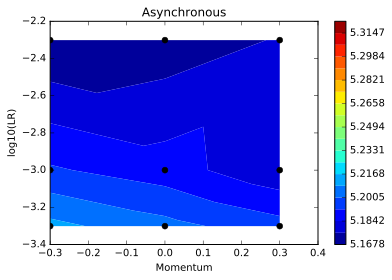

In [39]:
plot_loss_contour(loss_results, window=WINDOW, sync=False)

## Only plot the best run for each momentum value in each mode 

In [40]:
dict_of_winners = get_best_for_each_momentum(loss_results,WINDOW)

### DASHED = ASYNC
### SOLID = SYNC

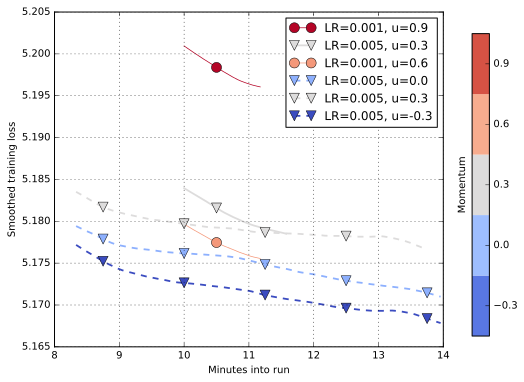

In [41]:
f = plot_all_runs(dict_of_winners, window=WINDOW, two_panels=False, marker_dict=marker_dict, mark_every=60,
                 sync_seconds_per_batch=SYNC_SECONDS_PER_BATCH, async_seconds_per_batch=ASYNC_SECONDS_PER_BATCH,
                 CG=M)

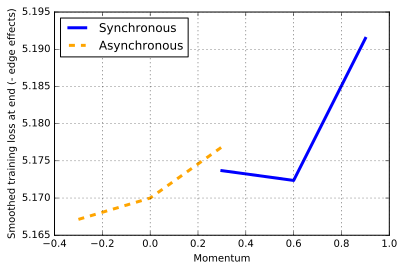

In [35]:
f=plot_momentum_dependence(loss_results, WINDOW)

## Plot winning curves along with evaluation loss level 

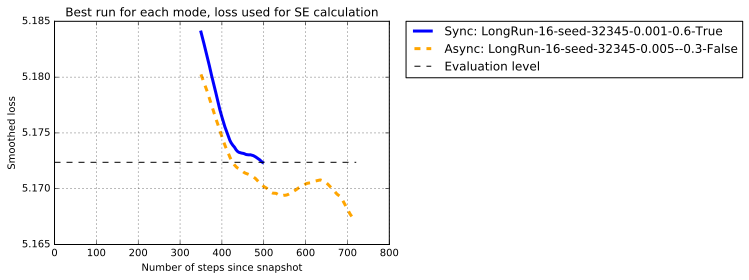

In [26]:
f=plot_se_calculation(loss_results, WINDOW)

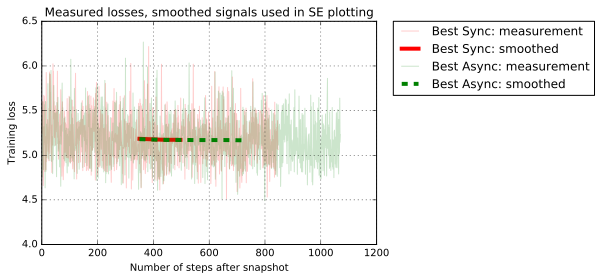

In [27]:
f=plot_winners_snr(loss_results, WINDOW)

# Plot HE-SE

plotting.py:264: RuntimeWarning: invalid value encountered in less_equal
  async_meets_target = np.argmax(a <= target)
plotting.py:265: RuntimeWarning: invalid value encountered in less_equal
  sync_meets_target = np.argmax(s <= target)


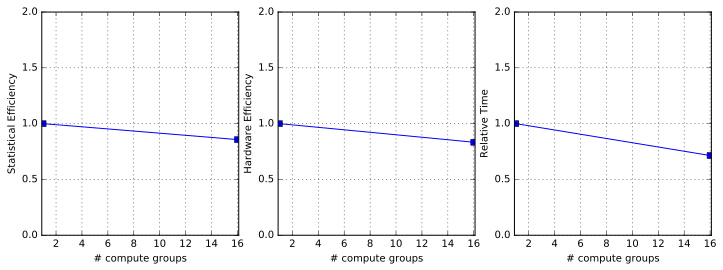

In [28]:
f = plot_se_he(loss_results, WINDOW, M, SYNC_SECONDS_PER_BATCH, ASYNC_SECONDS_PER_BATCH)

In [43]:
f.savefig('experiment4-se-he.png', bbox_inches='tight', pad_inches=0.1)

In [25]:
from IPython.display import HTML

if False:
    HTML('''<script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')